In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as mt

In [3]:
df_parameters = pd.read_excel('C:/Users/jae4518/OneDrive - Imperial College London/HiRise_Images_Clusters/ClustersDataSheet/NewClustersParameters.xlsx')
daubar_parameters = pd.read_excel('C:/Users/jae4518/OneDrive - Imperial College London/HiRise_Images_Clusters/ClustersDataSheet/DataDaubar2019.xlsx', sheet_name = 'Supplemental Table 2')

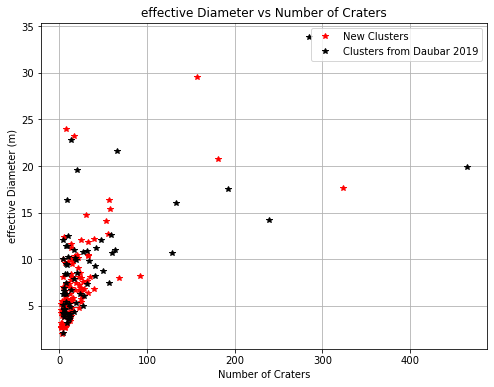

In [4]:
#effective diameter vs number of craters:
d_eff =np.array(df_parameters['d_eff'].values)
crater_no = np.array(df_parameters['Number_Craters'].values)
d_effD = np.array(daubar_parameters['Effective Diameter (m)'].values)
crater_noD = np.array(daubar_parameters['N craters'].values)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(crater_no,d_eff, 'r*', label = 'New Clusters') #plotting new clusters
ax.plot(crater_noD,d_effD, 'k*', label = 'Clusters from Daubar 2019') #plotting new clusters
ax.set_xlabel('Number of Craters')
ax.set_ylabel('effective Diameter (m)')
ax.set_title('effective Diameter vs Number of Craters')
ax.grid('k')
ax.legend(loc = 'best')
fig.savefig('DiametervsNoCraters.png')

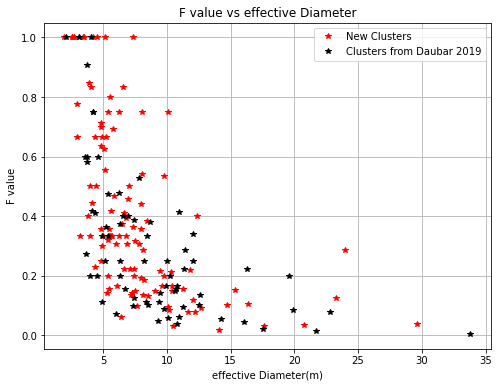

In [5]:
#F-value vs effective diameter:
F_values = np.array(df_parameters['F_value'].values)
F_valuesD = np.array(daubar_parameters['F_value'].values)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(d_eff, F_values, 'r*', label = 'New Clusters') #plotting new clusters
ax.plot(d_effD, F_valuesD, 'k*', label = 'Clusters from Daubar 2019') #plotting new clusters
ax.set_xlabel('effective Diameter(m)')
ax.set_ylabel('F value')
ax.set_title('F value vs effective Diameter')
ax.grid('k')
ax.legend(loc = 'best')
fig.savefig('Fvalue.png')

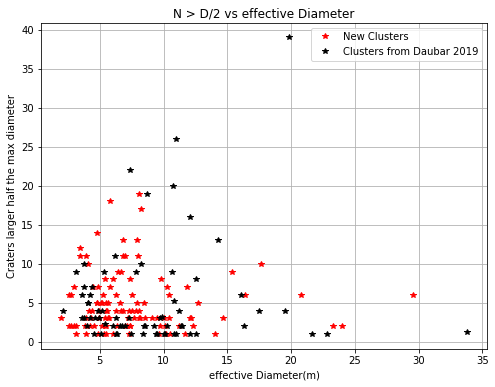

In [6]:
#N vs effective diameter:
N_array = np.array(df_parameters['N>D/2'].values)
ND = []
for n in range(0, len(crater_noD)):
    Nlarger = crater_noD[n]*F_valuesD[n]
    ND.append(Nlarger)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(d_eff, N_array, 'r*', label = 'New Clusters') #plotting new clusters
ax.plot(d_effD, ND, 'k*', label = 'Clusters from Daubar 2019') #plotting new clusters
ax.set_xlabel('effective Diameter(m)')
ax.set_ylabel('Craters larger half the max diameter')
ax.set_title('N > D/2 vs effective Diameter')
ax.grid('b')
ax.legend(loc = 'best')
fig.savefig('Nlarger.png')

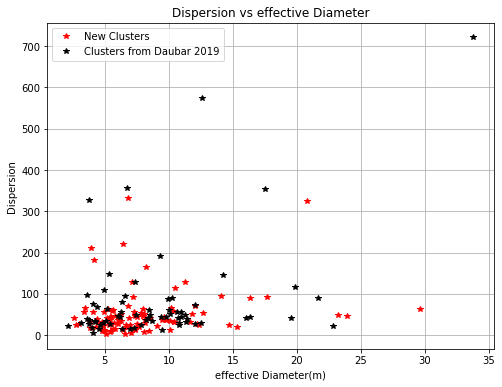

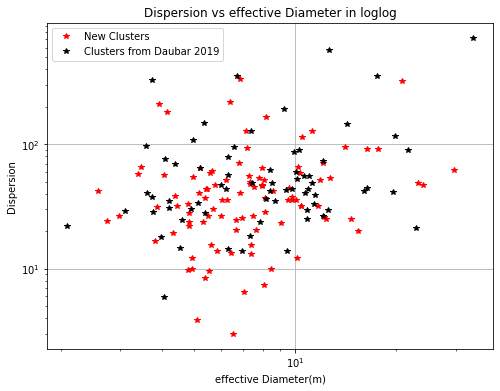

In [10]:
#Dispersion vs effective diameter:
disp = np.array(df_parameters['Dispersion(m)'].values)
dispD = np.array(daubar_parameters['Dispersion(m)'].values)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(d_eff, disp, 'r*', label = 'New Clusters') #plotting new clusters
ax.plot(d_effD, dispD, 'k*', label = 'Clusters from Daubar 2019')
ax.set_xlabel('effective Diameter(m)')
ax.set_ylabel('Dispersion')
ax.set_title('Dispersion vs effective Diameter')
ax.grid('k')
ax.legend(loc = 'best')
fig.savefig('Dispersion.png')
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111)
ax2.loglog(d_eff, disp, 'r*', label = 'New Clusters') #plotting new clusters
ax2.loglog(d_effD, dispD, 'k*', label = 'Clusters from Daubar 2019')
ax2.set_xlabel('effective Diameter(m)')
ax2.set_ylabel('Dispersion')
ax2.set_title('Dispersion vs effective Diameter in loglog')
ax2.grid('k')
ax2.legend(loc = 'best')
fig2.savefig('Dispersionlog.png')

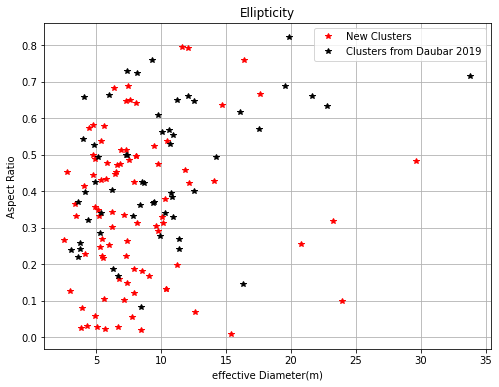

In [11]:
R1 = np.array(df_parameters['R1'].values)
R2 = np.array(df_parameters['R2'].values)
aspectratios = []
for n in range(0, len(R1)):
    ratio = R1[n]/R2[n]
    aspectratios.append(ratio)
R1D = np.array(daubar_parameters['R1'].values)
R2D = np.array(daubar_parameters['R2'].values)
aspectratiosD = []
for n in range(0, len(R1D)):
    ratio = R1D[n]/R2D[n]
    aspectratiosD.append(ratio)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(d_eff, aspectratios, 'r*', label = 'New Clusters') #plotting new clusters
ax.plot(d_effD, aspectratiosD, 'k*', label = 'Clusters from Daubar 2019')
ax.set_xlabel('effective Diameter(m)')
ax.set_ylabel('Aspect Ratio')
ax.set_title('Ellipticity')
ax.grid('k')
ax.legend(loc = 'best')
fig.savefig('Ellipticity.png')

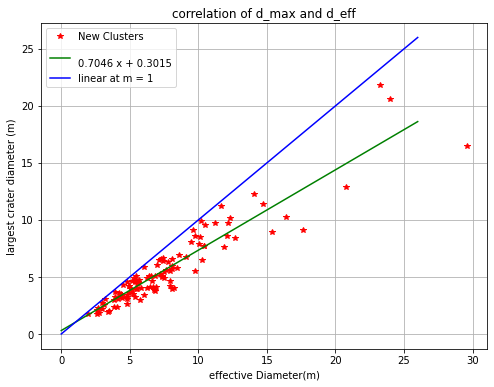

In [12]:
d_max = np.array(df_parameters['d_max'].values)
poly_coeffs = np.polyfit(d_eff, d_max, 1)
p = np.poly1d(poly_coeffs)
x = np.linspace(0,26,100)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(d_eff,d_max , 'r*', label = 'New Clusters') #plotting new clusters
ax.set_xlabel('effective Diameter(m)')
ax.set_ylabel('largest crater diameter (m)')
ax.set_title('correlation of d_max and d_eff')
ax.grid('k')
ax.plot(x, p(x),'g', label =p)
ax.plot(x,x,'b', label = 'linear at m = 1')
ax.legend(loc = 'best')
fig.savefig('correlationplot.png')

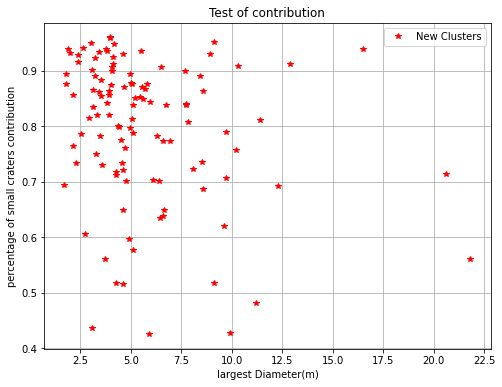

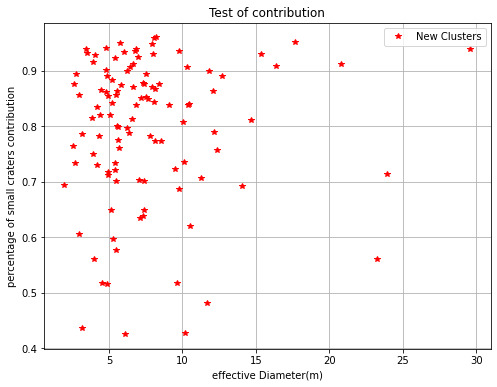

In [13]:
#new Contribution method?:
smallperc = []
for n in range(0, len(d_eff)):
    ratio = ((d_eff[n]**3 - d_max[n]**3)**(1/3))/d_eff[n]
    smallperc.append(ratio)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(d_max, smallperc , 'r*', label = 'New Clusters') #plotting new clusters
ax.set_xlabel('largest Diameter(m)')
ax.set_ylabel('percentage of small craters contribution')
ax.set_title('Test of contribution')
ax.grid('k')
ax.legend(loc = 'best')
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111)
ax2.plot(d_eff, smallperc , 'r*', label = 'New Clusters') #plotting new clusters
ax2.set_xlabel('effective Diameter(m)')
ax2.set_ylabel('percentage of small craters contribution')
ax2.set_title('Test of contribution')
ax2.grid('k')
ax2.legend(loc = 'best')